**Connect to GPU/TPU**
    - Settings -> GPU
  - Note: Once code is execution is done disconnect gpu/tpu

In [1]:
# Checking GPU Connection After Connecting

!nvidia-smi

Sat Sep  6 08:34:10 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### Following Pipeline

### **1. Data** - X & y
  - DataSet from Google Images and done Lableing Through Roboflow
  - Data Available in Train-Valid-Test folders with both images and labels

**Data Validation**

In [1]:
# Modules
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Changing Working Directory to Input
os.chdir("/kaggle/input/od-imglables")

In [3]:
os.listdir()

['README.dataset.txt',
 'README.roboflow.txt',
 'data.yaml',
 'valid',
 'test',
 'train']

In [4]:
len(os.listdir("train/images"))

269

In [5]:
len(os.listdir("train/labels"))

269

#### Validating Images along with .txt files

* In the folder checking each image file is having .txt file
* Removing irregualr files in both images and labels folder

**train**

In [6]:
images = [image.strip(".jpg") for image in os.listdir("train/images")] # image names
images[0:5]

['imgi_94_sddefault_jpg.rf.4c6856235b704f68fbe320757f6240f5',
 'imgi_116_hq720_jpg.rf.c7a0df0455474307289bf9a14736aba5',
 'imgi_111_FE3FE5D5-BF9A-491C-A995-1AA75129E35C_jpg.rf.ddf7deca2e68c152494033102ff9be03',
 'imgi_115_s-l1200_jpg.rf.e80653a0387a5915ec8825f1ae481694',
 'imgi_117_qzw0oedqiyq51_jpg.rf.08f08d302acd9ad410002562bfa2ce50']

In [7]:
labels = [label.strip(".txt") for label in os.listdir("train/labels")] # label names
labels[0:5]

['imgi_116_hq720_jpg.rf.c7a0df0455474307289bf9a14736aba5',
 'imgi_162_GettyImages-1330829113_jpg.rf.254ffaeb2a816f3d50dd69b41138e736',
 'imgi_88_stock-photo-well-used-old-tools-and-red-tool-box-on-white-background-290530628_jpg.rf.774b1f288557bfe379e816f65e7b5f3f',
 'imgi_164_wH1yKFH_jpg.rf.6ba030aa7e950d69b560994d4e582946',
 'imgi_153_garage-org-2_jpg.rf.dba2b66ee0be73d7e34df1f2c537d868']

In [8]:
set(images).symmetric_difference(set(labels))

set()

* There are no mismacthed files
    - if mismatched files found drop them in both images & labels
      - Also, Yolo by default will not consider these mismatched files while training

* **For the collected Images We have Below Classes in Labels**

    * Class names: **['brush', 'drill machine', 'fine point pliers', 'hammer', 'knife', 'pliers', 'scissor','screwdrivers','spanners','tape']**
    * Above comes with Annotations


* **Sample Image & Label**

In [15]:
os.listdir("train/images")[0:11]

['imgi_94_sddefault_jpg.rf.4c6856235b704f68fbe320757f6240f5.jpg',
 'imgi_116_hq720_jpg.rf.c7a0df0455474307289bf9a14736aba5.jpg',
 'imgi_111_FE3FE5D5-BF9A-491C-A995-1AA75129E35C_jpg.rf.ddf7deca2e68c152494033102ff9be03.jpg',
 'imgi_115_s-l1200_jpg.rf.e80653a0387a5915ec8825f1ae481694.jpg',
 'imgi_117_qzw0oedqiyq51_jpg.rf.08f08d302acd9ad410002562bfa2ce50.jpg',
 'imgi_153_00q0q_aOf0MZ1lQF9_0CI0ht_600x450_jpg.rf.ef58449092033d59db134f1c3f75bcdb.jpg',
 'imgi_4_default-3-_jpg.rf.b4fb2fd55e29ddd3f88b935439bbae48.jpg',
 'imgi_115_Used-Tool-Box-With-Tools_webp.rf.5cce12dbdbd6934c7271072e6ebfa21b.jpg',
 'imgi_99_TFHiHC_jpg.rf.31919553b29bbab37c94beaa3daf52d8.jpg',
 'imgi_128_pelican-blog-43-storage-foam-tool-box-case_jpg.rf.5471a3d7a3460d997897f2956d792bc0.jpg',
 'imgi_115_135882574_1_x_jpg.rf.598fed6e599c0ea846d05da788872fd6.jpg']

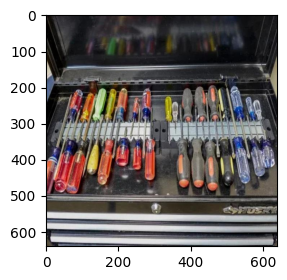

IndexError: list index out of range

In [18]:
# Image
sampleimg = mpimg.imread("/kaggle/input/od-imglables/train/images/imgi_105_1580333163987_webp.rf.5fdfc10c51c89e30e5347b70aae98daa.jpg")
plt.figure(figsize=(3,3))
plt.imshow(sampleimg)
plt.show()

# Annotation
sampleannotfile = open("/kaggle/input/od-imglables/train/labels/imgi_105_1580333163987_webp.rf.5fdfc10c51c89e30e5347b70aae98daa.txt")
indx = int(sampleannotfile.readlines()[0].split()[0].strip())

# We have Classes
classes = ['brush', 'drill machine', 'fine point pliers', 'hammer', 'knife', 'pliers', 'scissor','screwdrivers','spanners','tape']
print("Species:", classes[indx])

### 2. Creation of config file (yaml) for training

* We need to create a file for the training , which contains the path of images along with labels

* file name extension should be **.yaml**

* refer & edit the **data.yaml** file given according to your project

In [12]:
import yaml

data = {
    'train': '/kaggle/input/underwater-species/train/images',
    'val': '/kaggle/input/underwater-species/valid/images',
    'test': '/kaggle/input/underwater-species/test/images',  # optional
    'nc': 7,
    'names': ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
}

# Save to /kaggle/working
with open('/kaggle/working/data.yaml', 'w') as f:
    yaml.dump(data, f, default_flow_style=False)

print("✅ data.yaml created at /kaggle/working/data.yaml")

✅ data.yaml created at /kaggle/working/data.yaml


In [13]:
os.listdir()

['yolo11n.pt', 'data.yaml', 'valid', 'test', 'train']

### 3. Modeling

#### Module Installation

!pip install ultralytics

In [14]:
# Importing Yolo

from ultralytics import YOLO

* **Downloaded yolov11 pretrained weights file yolov11n.pt from github**

In [15]:

model = YOLO("/kaggle/input/underwater-species/yolo11n.pt")  # loading weights of a pretrained model (recommended for training)

* **Training Model with Data**

In [16]:
# Training Model

# Using train method with .yaml , epochs and hyp params

# Train
model.train(
    data="/kaggle/working/data.yaml",
    epochs=50,
    imgsz=640,
    project="/kaggle/working",   # ✅ Force saving to working dir
    name="underwaterspecies"           # ✅ Subfolder inside working
)

# Check for file path errors if any in data.yaml

Ultralytics 8.3.194 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/kaggle/input/underwater-species/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=underwaterspecies, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspect

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        127        909      0.795      0.699       0.76      0.462
                  fish         63        459      0.872       0.73       0.81      0.452
             jellyfish          9        155      0.775      0.871      0.897      0.512
               penguin         17        104      0.716      0.704       0.72      0.332
                puffin         15         74       0.74      0.461      0.561      0.264
                 shark         28         57      0.765      0.628      0.707      0.464
              starfish         17         27      0.941      0.741      0.772      0.562
              stingray         23         33      0.759      0.758      0.854      0.646
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to /kaggle/working/underwaterspecies


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e9eadbfaad0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

* **Evaluations**

In [17]:
metrics = model.val()  # evaluate model performance on the validation set

Ultralytics 8.3.194 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.6±0.1 ms, read: 188.6±86.7 MB/s, size: 109.4 KB)
val: Scanning /kaggle/input/underwater-species/valid/labels... 127 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 127/127 1.1Kit/s 0.1s<0.0s
WARNING ⚠️ val: Cache directory /kaggle/input/underwater-species/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 8/8 3.1it/s 2.6s0.4ss


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        127        909      0.793      0.707      0.763      0.462
                  fish         63        459      0.858      0.735      0.809      0.452
             jellyfish          9        155      0.799      0.884      0.904       0.51
               penguin         17        104      0.696      0.712      0.718       0.33
                puffin         15         74      0.777      0.471      0.571      0.268
                 shark         28         57      0.754      0.649       0.71      0.465
              starfish         17         27      0.935      0.741      0.771      0.562
              stingray         23         33       0.73      0.758      0.856      0.648
Speed: 0.7ms preprocess, 9.6ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /kaggle/working/underwaterspecies2


* **Prediction on Single Image**

In [18]:
model.predict('train/images/IMG_2578_jpeg_jpg.rf.63adda94658b934843ed3ab53fb52b7d.jpg', save=True, imgsz=640, conf=0.3)


image 1/1 /kaggle/input/underwater-species/train/images/IMG_2578_jpeg_jpg.rf.63adda94658b934843ed3ab53fb52b7d.jpg: 640x480 1 fish, 2 sharks, 4 stingrays, 44.5ms
Speed: 3.1ms preprocess, 44.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /kaggle/working/underwaterspecies3


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fish', 1: 'jellyfish', 2: 'penguin', 3: 'puffin', 4: 'shark', 5: 'starfish', 6: 'stingray'}
 obb: None
 orig_img: array([[[ 84,  33,  23],
         [ 84,  33,  23],
         [ 85,  34,  24],
         ...,
         [134,  46,   6],
         [135,  47,   7],
         [135,  47,   7]],
 
        [[ 83,  32,  22],
         [ 84,  33,  23],
         [ 85,  34,  24],
         ...,
         [134,  46,   6],
         [135,  47,   7],
         [135,  47,   7]],
 
        [[ 83,  32,  22],
         [ 84,  33,  23],
         [ 85,  34,  24],
         ...,
         [134,  46,   6],
         [135,  47,   7],
         [135,  47,   7]],
 
        ...,
 
        [[ 34,  12,   1],
         [ 39,  17,   6],
         [ 45,  23,  12],
         ...,
         [217, 156,  94],
         [217, 155,  95],
         [232, 171, 109]],
 
        [[ 41,  19,   8],
 

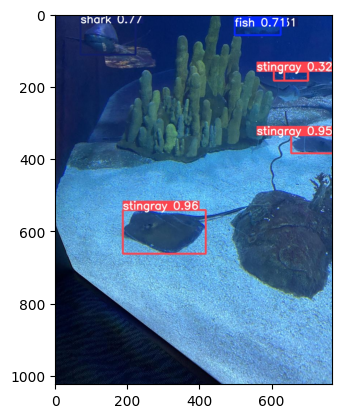

In [19]:
# Loading Predicted Image (Check Save Dir in Above Prediction)
sampleimg = mpimg.imread("/kaggle/working/underwaterspecies3/IMG_2578_jpeg_jpg.rf.63adda94658b934843ed3ab53fb52b7d.jpg")
plt.imshow(sampleimg)

**Download Trained Best Weight from the path given above**

/kaggle/working/underwaterspecies/weights/best.pt

* **Work on 30 Sec Video related to Task**

model.predict('/content/sp.mp4', save=True, imgsz=640, conf=0.3)

#### Further Notes:
- To imporove model performance, adjust epochs, imgsize, confidence values and other hyp params
- With downloaded best.pt work on model deployment.